![Titanic Picture](Titanic%20Picture.jpg)

<h15> <b>Source:</b> https://tinyurl.com/4b27rpe6 </h15>


<h1><b> Understanding the requirements of the Kaggle competition:</b></h1>

<h5> <b><u>Define the Problem:</u></b></h5>
    <h7> <m-right>We want to figure out whether a passenger survived or not during the titanic disaster. The provided data sets contain all of the passengers on the Titanic. Our goal is to develop a predictive model that can be used to identify whether a passenger survived the shipwreck.</margin-right></h7>

<h5> <b><u>Define our Hypothesis:</u></b></h5>
    <h7> There are a few areas where we could make initial predictions. Here are a few possible hypothesis I have initially:</h7><br>
    <br>
        <h8> <b>Gender:</b> A higher survival rate among woman and children during the titanic disaster according to a research article done on pnas.org. <b>(Citation: https://www.pnas.org/doi/full/10.1073/pnas.1207156109)</b> <br> <br>
        <b>Class:</b> A higher survival rate among the passengers with higher income as they may have had easier access to lifeboats.</h8><br><br>
        <b>Age:</b> A higher survival rate among children as they were prioritized during the evacuation.</h8><br><br>
        <b>Fare:</b> A higher survial rate based on the the ticket prices which may correlate to better access to lifeboats. </h8><br><br>
        <b>Family Size:</b> There may be lower survival rates if passengers travel alone. In addition, if families stayed together, this may lower their chances for survival </h8><br><br>
        <b>Embarked Port:</b> There may be a correlation with the embarked port to the survival rate. There may have been differences in cabin placement based on the port of entry. Different ports may also have passengers with different social statuses. </h8><br><br>
        <b>Cabin Information:</b> There may be a higher survival rate among cabins that were closer to lifeboats. </h8><br><br>



<h2><b><u> Importing the data as well as dependencies</u></b></h2>
<h6> The data was provided by the publisher of the competition. Citation provided below.</h6>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from IPython.display import display

#Loading the train and test datasets.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Confirming the import of the datasets as well as loading a preview.
print("Training Data Overview: ")
display(train_data.describe())

print("Missing Values: ")
#Checking for any null values in the dataset.
display(train_data.isnull().sum())

Training Data Overview: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Values: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Separating the categorical and numerical features & visualizing the dataset</h3>

'Categorical Features: '

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

'Numerical Features: '

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

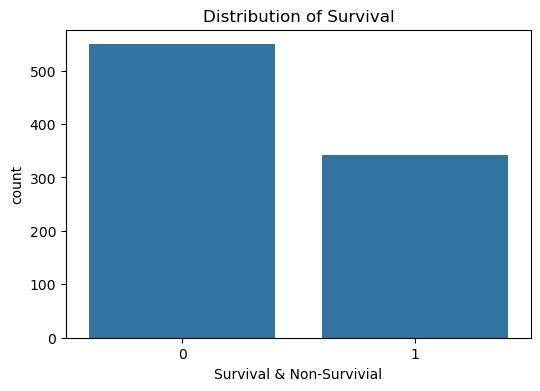

Text(0.5, 1.0, 'Correlation Heatmap')

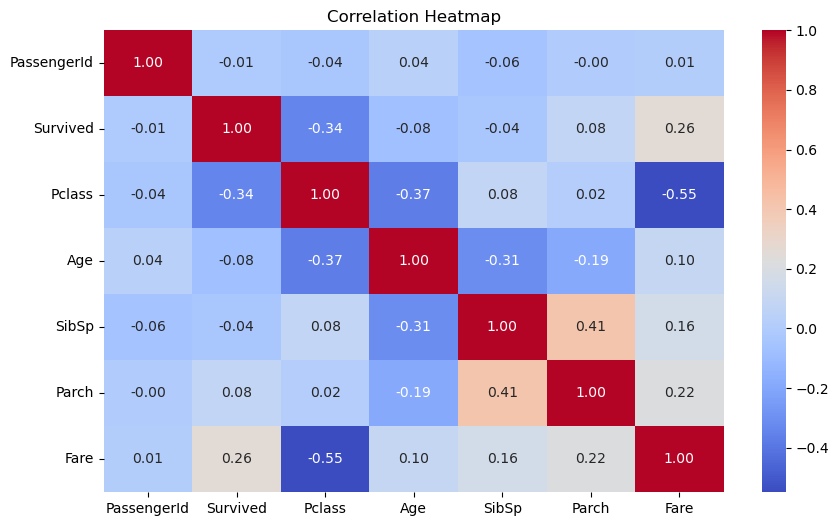

In [3]:
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

#First, lets visualize the entire dataset. Nice to see what we're working with.
display("Categorical Features: ", categorical_features)
display("Numerical Features: ", numerical_features)
plt.figure(figsize=(6, 4))
plt.xlabel("Survival & Non-Survivial")
sns.countplot(x=train_data['Survived'])
plt.title('Distribution of Survival')
plt.show()

# Heat map of the dataset to understand the correlation between features.
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
#Lets limit the decimal places to 2 and use a coolwarm color map.
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

<h3> Handling the missing values of the dataset</h3>

In [4]:
#Filling in the median for the missing values for Age since Age is generally a skewed distribution in a data set.
train_data.loc[:, "Age"] = train_data["Age"].fillna(train_data["Age"].median())

#Filling in the mode for Embarked as it is a categorical feature.
train_data.loc[:, "Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

#Seems like Cabin is missing a lot of values. Let's keep the feature for the sake of analysis, but we would generally drop this as it is missing too many values.
train_data.loc[:, "Cabin"] = train_data["Cabin"].fillna("n")

#Rechecking for any null values in the dataset.
display(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<h2><b><u>Exploratory Data Analysis: Validating our Hypothesis & Visualizations.</u></b></h2>

<h3> Survival Based on Gender<h3>

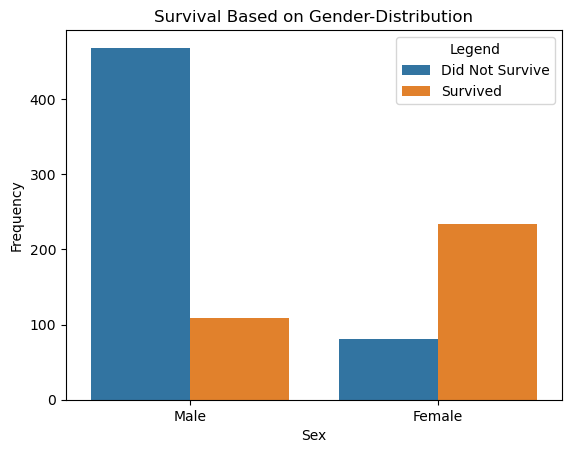

Survived
0    549
1    342
Name: count, dtype: int64


In [5]:
#Bar chart with the appropriate labels and title
#This chart shows the distribution of survival based on Gender and doesn't account for the 
sns.countplot(data = train_data, x = 'Sex', hue = 'Survived',)
plt.title('Survival Based on Gender-Distribution')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.ylabel('Frequency')
plt.legend(title = 'Legend', labels = ['Did Not Survive', 'Survived'])
plt.show()
print(train_data["Survived"].value_counts())

<h4>The conditional probability of survival given gender:

\begin{array}{l}
P(\left. {Survival} \right|Male) = \frac{{P(Survival \cap Male)}}{{P(Male)}} \\
P(\left. {Survival} \right|Female) = \frac{{P(Survival \cap Female)}}{{P(Female)}}
\end{array}

</h4>

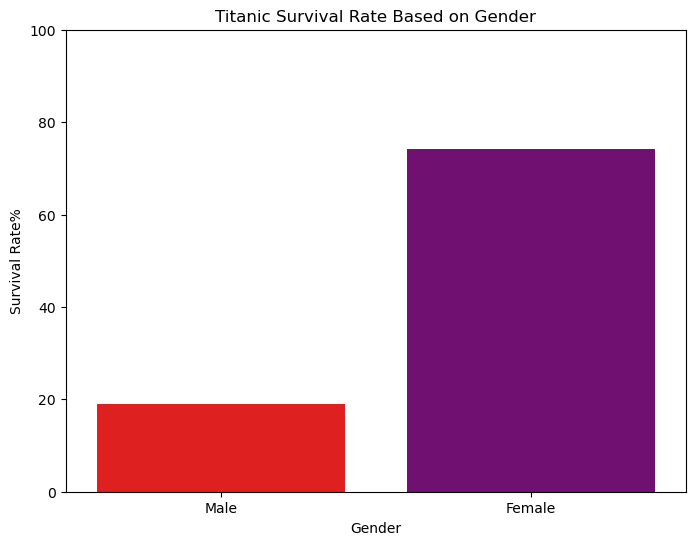

Survival Rate for Males:  18.890814558058924
Survival Rate for Females:  74.20382165605095
Total Males:  577
Total Females:  314
Males who survived:  109
Females who survived:  233


In [6]:
#Let's look at the rate of survival. This will account for the imbalance in the data.
total_males = train_data[train_data['Sex']== 'male'].shape[0]
total_females = train_data[train_data['Sex'] == 'female'].shape[0]
survived_males = train_data[(train_data['Sex'] == 'male') & (train_data['Survived']==1)].shape[0]
survived_females = train_data[(train_data['Sex'] == 'female') & (train_data['Survived']==1)].shape[0]

survival_rate_male = (survived_males / total_males)*100
survival_rate_female = (survived_females / total_females)*100

#Let's add a bar chart to compare the two survival rates.
survival_rates = [survival_rate_male, survival_rate_female]
labels = ['Male', 'Female']
plt.figure(figsize=(8, 6))
sns.barplot(x = labels, y = survival_rates, hue = labels, palette=['red', 'purple'])
plt.xlabel("Gender")
plt.ylabel("Survival Rate%")
plt.title("Titanic Survival Rate Based on Gender")
# I want to scale it appropriately
plt.ylim(0, 100)
plt.show()

print('Survival Rate for Males: ', survival_rate_male)
print('Survival Rate for Females: ', survival_rate_female)
print('Total Males: ', total_males)
print('Total Females: ', total_females)
print('Males who survived: ', survived_males)
print('Females who survived: ', survived_females)

<h3>Survival Based on Class</h3>

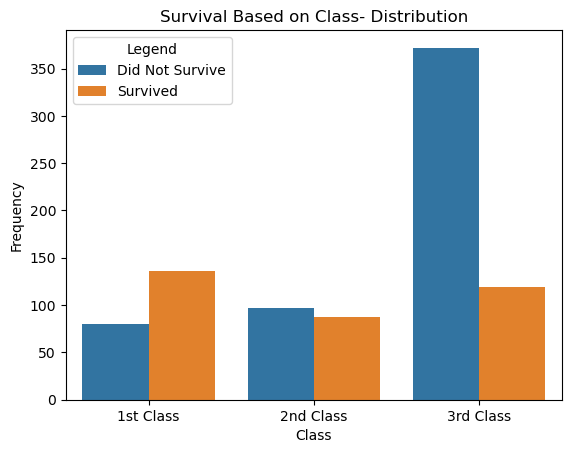

In [7]:
# Bar chart with the appropriate labels
sns.countplot(data = train_data, x = 'Pclass', hue = 'Survived',)
plt.title('Survival Based on Class- Distribution')
plt.xticks(ticks=[0,1,2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.legend(title = 'Legend', labels = ['Did Not Survive', 'Survived'])
plt.show()

<h4>The conditional probability of survival given class:

\begin{array}{l}
P(\left. {Survival} \right|FirstClass) = \frac{P(Survival \cap FirstClass)}{P(FirstClass)} \\ \\
P(\left. {Survival} \right|SecondClass) = \frac{P(Survival \cap SecondClass)}{P(SecondClass)} \\ \\
P(\left. {Survival} \right|ThirdClass) = \frac{P(Survival \cap ThirdClass)}{P(ThirdClass)}
\end{array}


</h4>

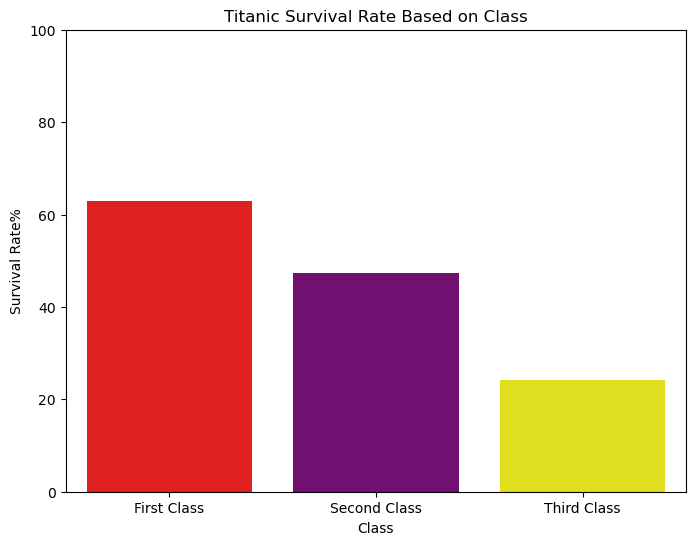

Survival Rate for First Class:  62.96296296296296
Survival Rate for Second Class:  47.28260869565217
Survival Rate for Third Class:  24.236252545824847


In [8]:
#Let's look at the rate of survival. This will account for the imbalance in the data.
total_first_class = train_data[train_data['Pclass']== 1].shape[0]
total_second_class = train_data[train_data['Pclass'] == 2].shape[0]
total_third_class = train_data[train_data['Pclass'] == 3].shape[0]

survived_first_class = train_data[(train_data['Pclass'] == 1) & (train_data['Survived']==1)].shape[0]
survived_second_class = train_data[(train_data['Pclass'] == 2) & (train_data['Survived']==1)].shape[0]
survived_third_class = train_data[(train_data['Pclass'] == 3) & (train_data['Survived']==1)].shape[0]


survival_rate_first = (survived_first_class / total_first_class)*100
survival_rate_second = (survived_second_class / total_second_class)*100
survival_rate_third = (survived_third_class / total_third_class)*100


#Let's add a bar chart to compare the two survival rates.
survival_rates_2 = [survival_rate_first, survival_rate_second, survival_rate_third]
labels_2 = ['First Class', 'Second Class', 'Third Class']
plt.figure(figsize=(8, 6))
sns.barplot(x = labels_2, y = survival_rates_2, hue = labels_2, palette=['red', 'purple', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Survival Rate%")
plt.title("Titanic Survival Rate Based on Class")
# I want to scale it appropriately
plt.ylim(0, 100)
plt.show()

print('Survival Rate for First Class: ', survival_rate_first)
print('Survival Rate for Second Class: ', survival_rate_second)
print('Survival Rate for Third Class: ', survival_rate_third)

<h3>Survival Based on Age</h3>

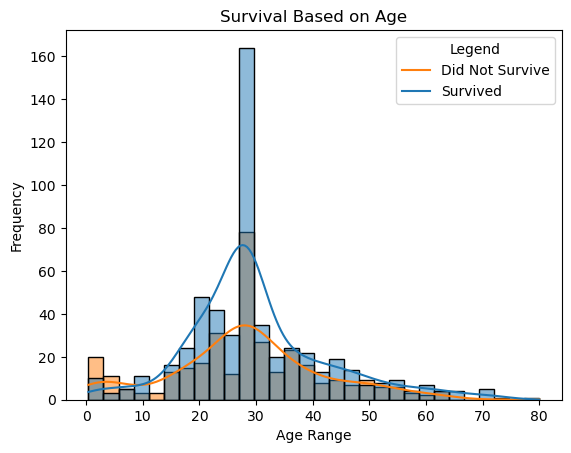

In [9]:
#Histogram based on Age range. Included with a kernel density estimator to help visualize the distribution.
sns.histplot(data = train_data, x = 'Age', hue = 'Survived', kde = True, bins = 30)
plt.title('Survival Based on Age')
plt.ylabel('Frequency')
plt.xlabel('Age Range')
plt.legend(title = 'Legend', labels = ['Did Not Survive', 'Survived'])
plt.show()

#### Survival Rate Based on Age Range:

$$
P(\text{Survival} \mid \text{AgeRange}) = \frac{P(\text{Survival} \cap \text{AgeRange})}{P(\text{AgeRange})}
$$


C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_33060\3138134228.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = train_data.groupby("Age Range")["Survived"].count()
C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_33060\3138134228.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survivors = train_data.groupby("Age Range")["Survived"].sum()


,Total Passengers,Survived,Survival Rate (%)
Age Range,,,
0-10,62,38,61.290323
11-20,102,41,40.196078
21-30,397,129,32.493703
31-40,167,73,43.712575
41-50,89,34,38.202247
51-60,48,20,41.666667
61-70,19,6,31.578947
71-80,6,0,0.000000


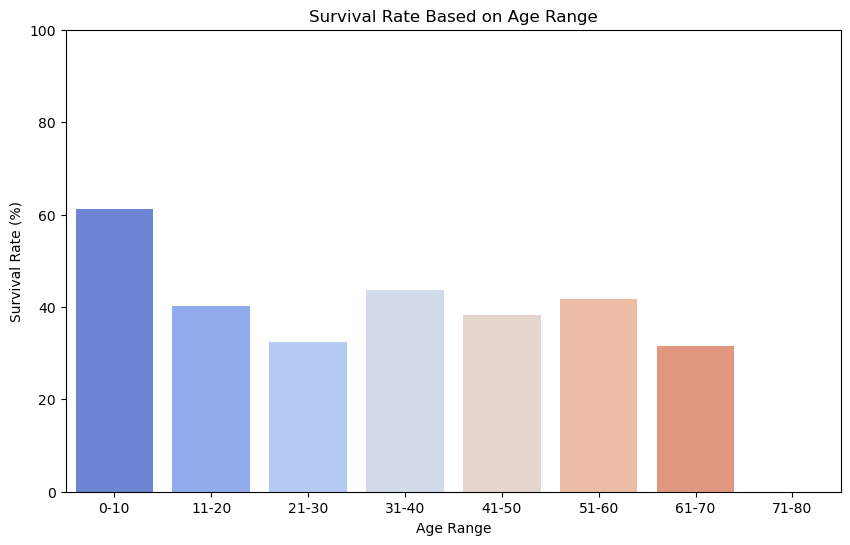

In [10]:
#Lets divide the age range into separate bins and assign labels to each bin.
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

#Lets put the data into these bins and count the number of passengers in each bin.
train_data["Age Range"] = pd.cut(train_data["Age"], bins=age_bins, labels=age_labels, right=False)
age_group_counts = train_data.groupby("Age Range")["Survived"].count()
age_group_survivors = train_data.groupby("Age Range")["Survived"].sum()

# Now we can calculate the survival rate for each age group as the probability of survival given the age range.
survival_rate_age = (age_group_survivors / age_group_counts) * 100
age_survival_df = pd.DataFrame({
    "Total Passengers": age_group_counts,
    "Survived": age_group_survivors,
    "Survival Rate (%)": survival_rate_age
})

# Displaying the table with the survival rates along with their bins
display(age_survival_df)

# Plot survival rates based on age
plt.figure(figsize=(10,6))
sns.barplot(data=age_survival_df, x=age_survival_df.index, y="Survival Rate (%)", hue="Age Range", palette="coolwarm")
plt.xlabel("Age Range")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Age Range")
plt.ylim(0, 100)
plt.show()

<h3>Survival based on Fare</h3>

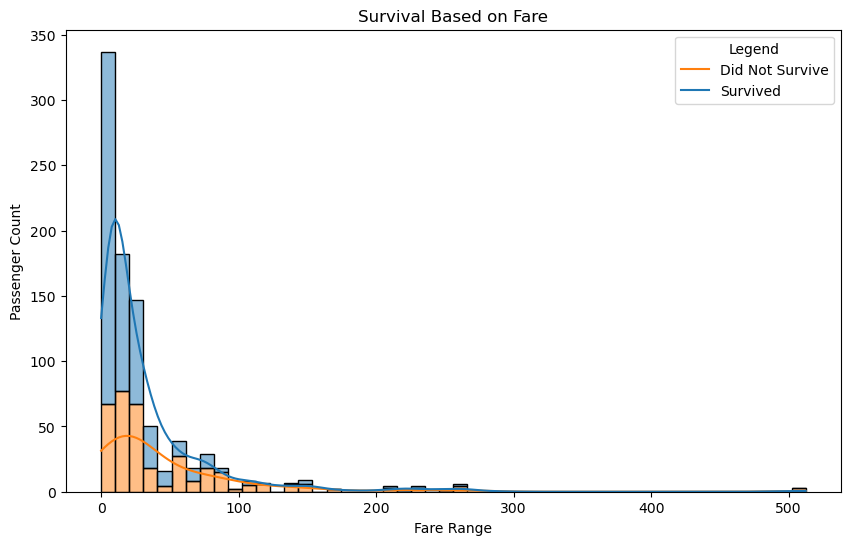

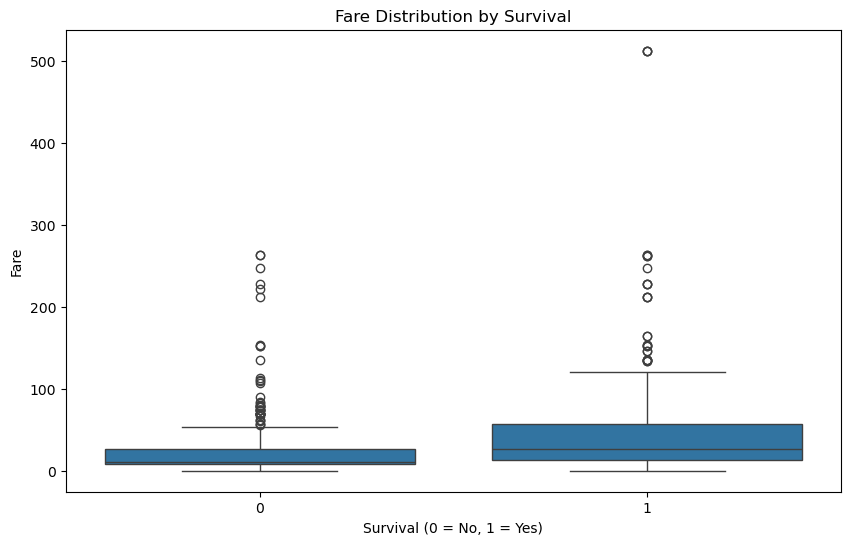

In [11]:
#Histogram based on Fare range.
plt.figure(figsize=(10,6))
sns.histplot(data=train_data, x="Fare", hue="Survived", bins=50, element="bars", multiple="stack", kde=True)
plt.xlabel("Fare Range")
plt.ylabel("Passenger Count")  # Ensure actual counts, not density
plt.title("Survival Based on Fare")
plt.legend(title="Legend", labels=["Did Not Survive", "Survived"])
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x="Survived", y="Fare")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()


,Total Passengers,Survived,Survival Rate (%)
Fare Range,,,
0-10,336,67,19.940476
11-20,179,76,42.458101
21-30,136,58,42.647059
31-50,79,32,40.506329
51-100,108,70,64.814815
101-200,33,25,75.757576
201-300,17,11,64.705882
301-500,0,0,NaN
501+,3,3,100.000000


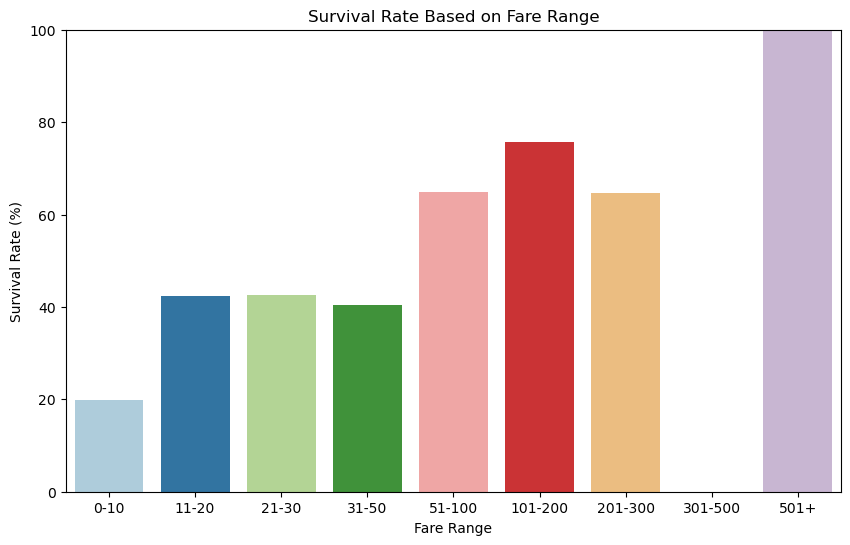

In [12]:
#Lets divide the fare range into separate bins and assign labels to each bin.
#Note: The bins here are a bit uneven since they better reflect the distribution of the data.
fare_bins = [0, 10, 20, 30, 50, 100, 200, 300, 500, 600]
fare_labels = ["0-10", "11-20", "21-30", "31-50", "51-100", "101-200", "201-300", "301-500", "501+"]

#Lets put the data into these bins and count the number of passengers in each bin.
train_data["Fare Range"] = pd.cut(train_data["Fare"], bins=fare_bins, labels=fare_labels, right=False)

# Now we can calculate the survival rate for each age group as the probability of survival given the age range.
fare_group_counts = train_data.groupby("Fare Range", observed=False)["Survived"].count()
fare_group_survivors = train_data.groupby("Fare Range", observed=False)["Survived"].sum()
survival_rate_fare = (fare_group_survivors / fare_group_counts) * 100

# Create DataFrame to display results
fare_survival_df = pd.DataFrame({
    "Total Passengers": fare_group_counts,
    "Survived": fare_group_survivors,
    "Survival Rate (%)": survival_rate_fare
})

# Display the table
display(fare_survival_df)

# Plot survival rates based on fare
plt.figure(figsize=(10,6))
sns.barplot(x=fare_survival_df.index, y=fare_survival_df["Survival Rate (%)"], hue=fare_survival_df.index, palette= 'Paired')

plt.xlabel("Fare Range")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Fare Range")
plt.ylim(0, 100)
plt.show()

<h3>Survival Based on Family size</h3>

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

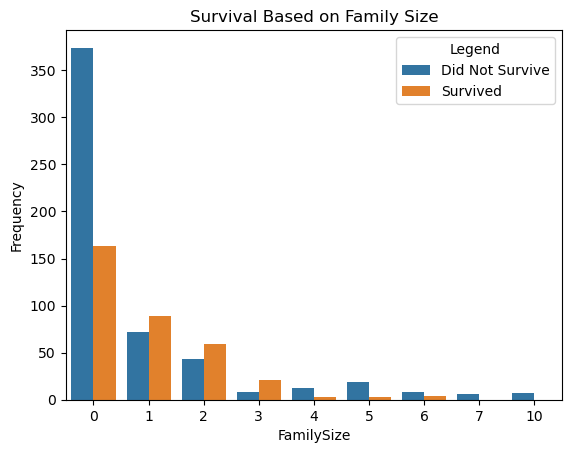

In [13]:
#Since we don't have a feature that reflects the size of the family, we can create a new feature that combines the SibSp and Parch features where SIBSp is the number of siblings/spouses aboard and Parch is the number of parents/children aboard.
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
display(train_data['FamilySize'].value_counts())

#Bar chart with the appropriate labels and title
sns.countplot(data = train_data, x = 'FamilySize', hue = 'Survived',)
plt.title('Survival Based on Family Size')
plt.ylabel('Frequency')
plt.legend(title = 'Legend', labels = ['Did Not Survive', 'Survived'])
plt.show()


,Total Passengers,Survived,Survival Rate (%)
Family Size Range,,,
Alone,537,163,30.353818
Small (1),161,89,55.279503
Small (2-3),131,80,61.068702
Medium (4-5),37,6,16.216216
Large (6-7),18,4,22.222222
Very Large (8+),7,0,0.000000


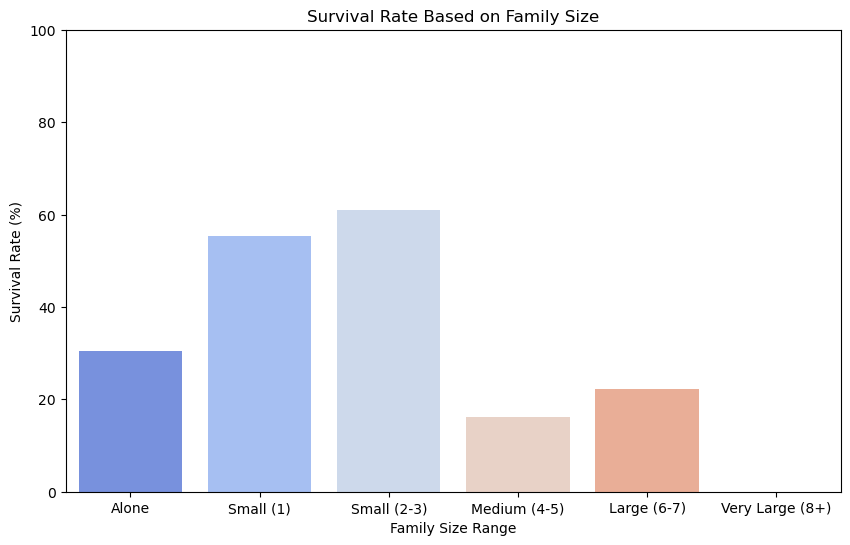

In [14]:
# Categorize family sizes into bins(we're using bins starting from -1 since we are using the pd.cut method)
family_bins = [-1, 0, 1, 3, 5, 7, 11]  
family_labels = ["Alone", "Small (1)", "Small (2-3)", "Medium (4-5)", "Large (6-7)", "Very Large (8+)"]
train_data["Family Size Range"] = pd.cut(train_data["FamilySize"], bins=family_bins, labels=family_labels, right=True)

# Count total passengers and survivors per family size category
family_group_counts = train_data.groupby("Family Size Range", observed=False)["Survived"].count()
family_group_survivors = train_data.groupby("Family Size Range", observed=False)["Survived"].sum()

# Compute survival rates
survival_rate_family = (family_group_survivors / family_group_counts) * 100

# Create DataFrame to display results
family_survival_df = pd.DataFrame({
    "Total Passengers": family_group_counts,
    "Survived": family_group_survivors,
    "Survival Rate (%)": survival_rate_family
})
# Display the corrected table
display(family_survival_df)

# Plot survival rates based on Family Size
plt.figure(figsize=(10,6))
sns.barplot(x=family_survival_df.index, y=family_survival_df["Survival Rate (%)"], hue=family_survival_df.index, palette="coolwarm")

plt.xlabel("Family Size Range")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Family Size")
plt.ylim(0, 100)
plt.show()

<h3>Survival based on Embarked Port</h3>

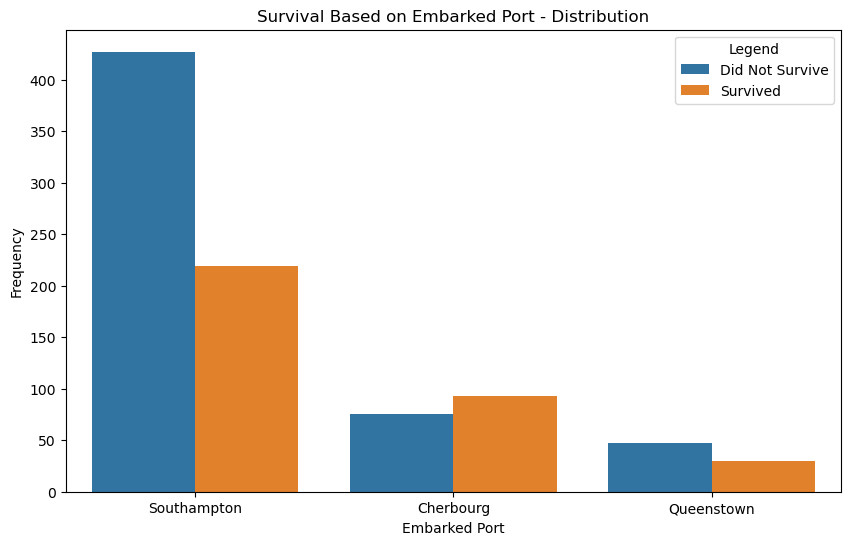

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x="Embarked", hue="Survived")

# Plotting the count of passengers who embarked at each port
plt.title("Survival Based on Embarked Port - Distribution")
plt.xlabel("Embarked Port")
plt.ylabel("Frequency")
plt.xticks(ticks=[0,1,2], labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.legend(title="Legend", labels=["Did Not Survive", "Survived"])
plt.show()

,Total Passengers,Survived,Survival Rate (%)
Embarked,,,
C,168,93,55.357143
Q,77,30,38.961039
S,646,219,33.900929


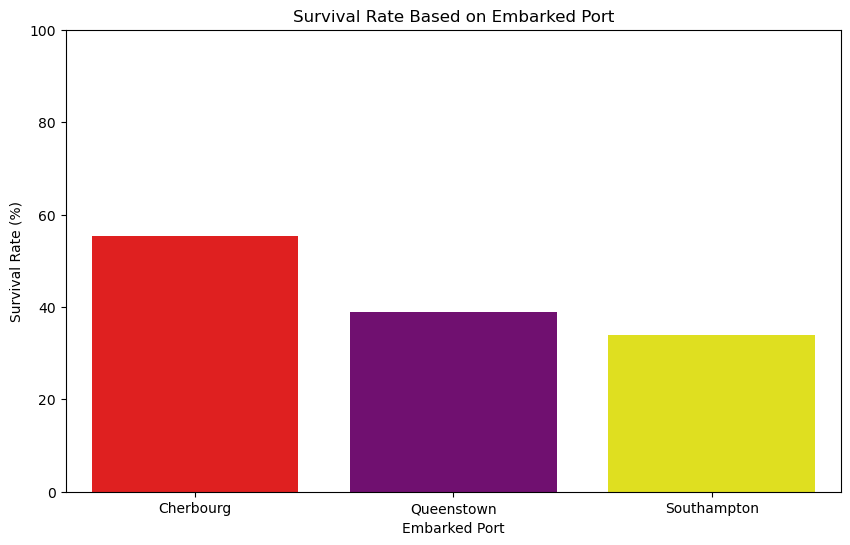

In [16]:
#Total passengers per Embarked port
embarked_counts = train_data.groupby("Embarked")["Survived"].count()

#Survivors per Embarked port
embarked_survivors = train_data.groupby("Embarked")["Survived"].sum()

#Finding the survival rate
survival_rate_embarked = (embarked_survivors / embarked_counts) * 100

#Setting the DataFrame for displaying the survival rate
embarked_survival_df = pd.DataFrame({
    "Total Passengers": embarked_counts,
    "Survived": embarked_survivors,
    "Survival Rate (%)": survival_rate_embarked
})
display(embarked_survival_df)

#plotting the survival rate for each Embarked Port
plt.figure(figsize=(10,6))
sns.barplot(x=embarked_survival_df.index, y=embarked_survival_df["Survival Rate (%)"], hue=embarked_survival_df.index, palette=['red', 'purple', 'yellow'])

plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Embarked Port")
plt.xticks(ticks=[0,1,2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.ylim(0, 100)
plt.show()


<h3>Survival based on Cabin Information</h3>

,Total Passengers,Survived,Survival Rate (%)
Cabin Deck,,,
A,15,7,46.666667
B,47,35,74.468085
C,59,35,59.322034
D,33,25,75.757576
E,32,24,75.000000
F,13,8,61.538462
G,4,2,50.000000
T,1,0,0.000000
Unknown,687,206,29.985444


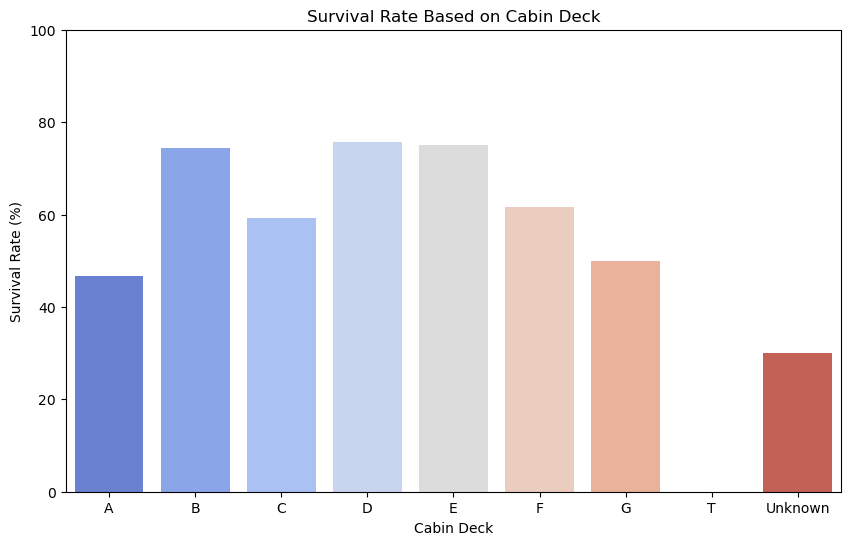

In [17]:
#The decks are separated by the first letter of the Cabin feature. Let's extract that information.
train_data["Cabin Deck"] = train_data["Cabin"].astype(str).str[0]  # Take the first letter
train_data["Cabin Deck"] = train_data["Cabin Deck"].replace("n", "Unknown")

#Now we count the number of passengers per deck
cabin_counts = train_data.groupby("Cabin Deck")["Survived"].count()
cabin_survivors = train_data.groupby("Cabin Deck")["Survived"].sum()

# calculating the survival rate for each deck
survival_rate_cabin = (cabin_survivors / cabin_counts) * 100
# Create DataFrame for display
cabin_survival_df = pd.DataFrame({
    "Total Passengers": cabin_counts,
    "Survived": cabin_survivors,
    "Survival Rate (%)": survival_rate_cabin
})

display(cabin_survival_df)

#Now lets visualize the data
plt.figure(figsize=(10,6))
sns.barplot(x=cabin_survival_df.index, y=cabin_survival_df["Survival Rate (%)"], hue=cabin_survival_df.index, palette="coolwarm")
plt.xlabel("Cabin Deck")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Cabin Deck")
plt.ylim(0, 100)
plt.show()

<h2><b>Data Cleaning and Preprocessing<b></h2>

In [18]:
#Many of these steps have already been done, but let's do them again for the test data to ensure consistency.
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
train_data["Cabin"] = train_data["Cabin"].fillna("Unknown")
train_data["Age Range"], age_bins = pd.qcut(train_data["Age"], q=5, labels=False, retbins=True, duplicates="drop")
print("Missing Values After Cleaning:")
display(train_data.isnull().sum())



Missing Values After Cleaning:


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                0
Embarked             0
Age Range            0
Fare Range           0
FamilySize           0
Family Size Range    0
Cabin Deck           0
dtype: int64

In [19]:
#Lets reset the train_data to the default. This will make sure that the training data model is consistent with the Kaggle competition requirements.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

# We will use the median for the "Fare"
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

# We will use the mode for the "Embarked"
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])

# We can Extract the first letter in Cabin as we did before and save it as a new feature.
test_data["Cabin Deck"] = test_data["Cabin"].astype(str).str[0]
test_data["Cabin Deck"] = test_data["Cabin Deck"].replace("n", "Unknown")

#Processing the rest of the data
train_data["Fare Bin"], fare_bins = pd.qcut(train_data["Fare"], q=5, labels=False, retbins=True)
test_data["Fare Bin"] = pd.cut(test_data["Fare"], bins=fare_bins, labels=False, include_lowest=True)
train_data["Age Bin"], age_bins = pd.qcut(train_data["Age"], q=5, labels=False, retbins=True, duplicates="drop")
test_data["Age Bin"] = pd.cut(test_data["Age"], bins=age_bins, labels=False, include_lowest=True)

# We are using One-Hot Encoding here to convert "Embarked" since it is a categorical feature.
train_data = pd.get_dummies(train_data, columns=["Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Embarked"], drop_first=True)

# Converting Gender to Binary
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})

#Finally, we are dropping unnecessary columns
train_data = train_data.drop(columns=["Name", "Ticket", "PassengerId", "Cabin"])

# Now let's preview the training data.
display(train_data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare Bin,Age Bin,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1,False,True
1,1,1,1,38.0,1,0,71.2833,4,2,False,False
2,1,3,1,26.0,0,0,7.9250,1,1,False,True
3,1,1,1,35.0,1,0,53.1000,4,2,False,True
4,0,3,0,35.0,0,0,8.0500,1,2,False,True


In [20]:
#time to use scikitlearn to help us develop a machine learning model.
from sklearn.model_selection import train_test_split

# Our target variable
y = train_data["Survived"]

# Our feature variables, excluding the target variable
X = train_data.drop(columns=["Survived"])

# Split into training (80%) and validation (20%) sets... We need to validate our model before using it on the test data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Let's look at the shape of the training and validation sets.
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)

Training Set: (712, 10) (712,)
Validation Set: (179, 10) (179,)


In [21]:
#Now we need to regress the data using a Logistic Regression model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=500) # lets do it over 500 iterations...
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7877094972067039


In [22]:
#In our case lets use a random forest model to help come up with some predictions.
from sklearn.ensemble import RandomForestClassifier

# Initializing, training, and making predictions using the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

# Evaluate model performance
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print("Random Forest Validation Accuracy:", rf_accuracy)

Random Forest Validation Accuracy: 0.8324022346368715


In [23]:
final_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_model.fit(X_train, y_train)
X_test = test_data.drop(columns=["PassengerId"])
X_test = test_data.drop(columns=["PassengerId", "Cabin", "Cabin Deck", "Name", "Ticket"], errors="ignore")
y_test_pred = final_rf_model.predict(X_test)

# Let's save this to a new file (dataframe)
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_test_pred
})

# Saving the file
submission.to_csv("submission.csv", index=False)

<h1> Now lets see how the test model compares with the training data</h1>

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1
Survived
0    62.200957
1    37.799043
Name: proportion, dtype: float64
Training Data Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

Predicted Survival Rate:
Survived
0    62.200957
1    37.799043
Name: proportion, dtype: float64


C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_33060\16372954.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=predictions_df, x="Survived", palette=['red', 'blue'])


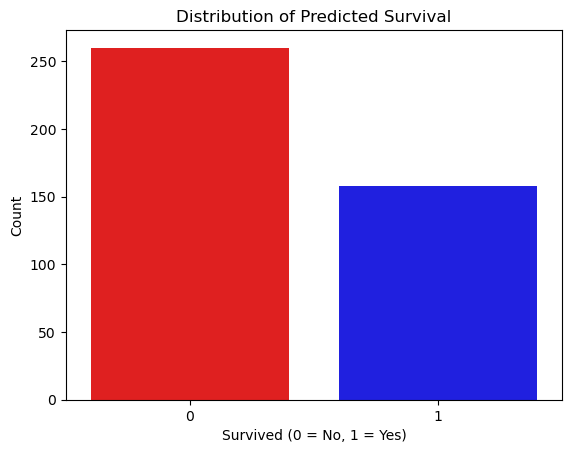

    PassengerId  Survived
3           895         1
4           896         1
8           900         1
12          904         1
14          906         1
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
5          897         0
6          898         0
      Feature  Importance
1         Sex    0.267104
5        Fare    0.232379
2         Age    0.205633
0      Pclass    0.079114
6    Fare Bin    0.054580
3       SibSp    0.048746
7     Age Bin    0.043949
4       Parch    0.033181
9  Embarked_S    0.025893
8  Embarked_Q    0.009421


C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_33060\16372954.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df["Importance"], y=features_df["Feature"], palette=['red', 'purple', 'yellow'])
C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_33060\16372954.py:38: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=features_df["Importance"], y=features_df["Feature"], palette=['red', 'purple', 'yellow'])


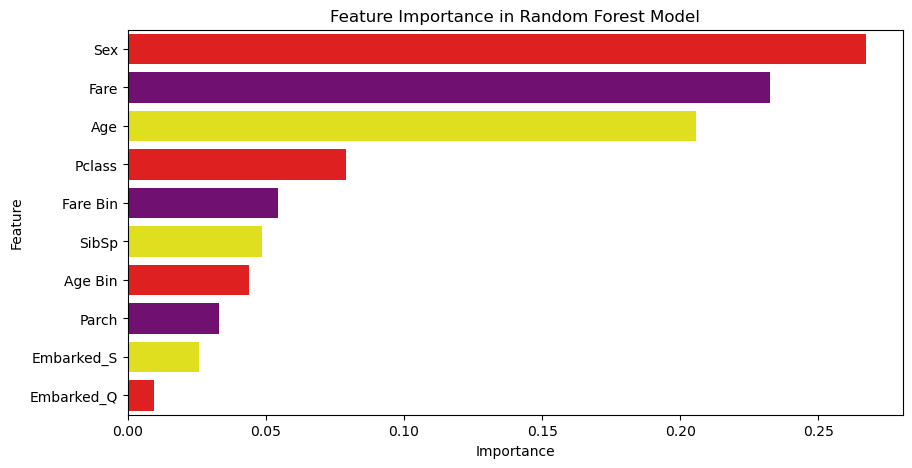

Pclass
1    0.626168
2    0.344086
3    0.270642
Name: Survived, dtype: float64
Sex
female    0.789474
male      0.142857
Name: Survived, dtype: float64
Fare Category
Low          0.263158
Medium       0.197917
High         0.447619
Very High    0.607843
Name: Survived, dtype: float64


C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_33060\16372954.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby("Fare Category")["Survived"].mean())


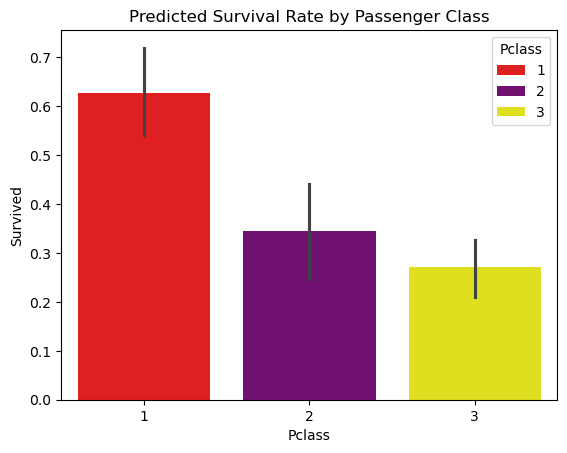

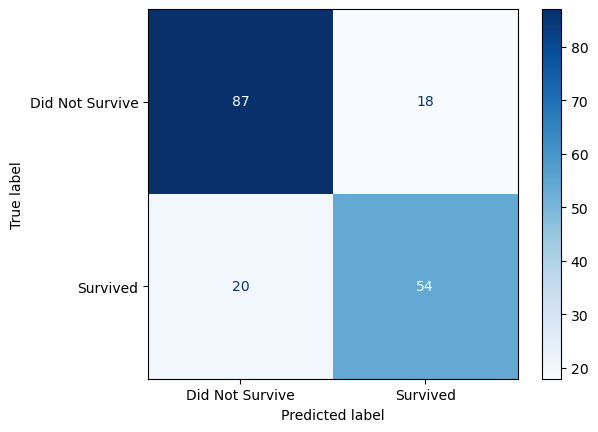

In [27]:
import pandas as pd

predictions_df = pd.read_csv("submission.csv")
print(predictions_df.head())
print(predictions_df["Survived"].value_counts(normalize=True) * 100)
train_data = pd.read_csv("train.csv")
print("Training Data Survival Rate:")
print(train_data["Survived"].value_counts(normalize=True) * 100)

print("\nPredicted Survival Rate:")
print(predictions_df["Survived"].value_counts(normalize=True) * 100)

# Let's visualize the predicted survival rates
# Plotting the distribution of predicted survival
sns.countplot(data=predictions_df, x="Survived", palette=['red', 'blue'])
plt.title("Distribution of Predicted Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()\
    
# Top passengers predicted to survive
print(predictions_df[predictions_df["Survived"] == 1].head())

# Top passengers predicted NOT to survive
print(predictions_df[predictions_df["Survived"] == 0].head())
import numpy as np

# Using feature importances from the Random Forest model to rank features
feature_importance = final_rf_model.feature_importances_
features_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Displaying the most important features
print(features_df)

# Now we can plot  the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=features_df["Importance"], y=features_df["Feature"], palette=['red', 'purple', 'yellow'])
plt.title("Feature Importance in Random Forest Model")
plt.show()

# Reloading the test data before dropping PassengerId
test_data = pd.read_csv("test.csv")
merged_df = test_data.merge(predictions_df, on="PassengerId")

# Survival rate by class
print(merged_df.groupby("Pclass")["Survived"].mean())

# Survival rate by gender
print(merged_df.groupby("Sex")["Survived"].mean())

# Survival rate by fare range
merged_df["Fare Category"] = pd.qcut(merged_df["Fare"], 4, labels=["Low", "Medium", "High", "Very High"])
print(merged_df.groupby("Fare Category")["Survived"].mean())

# Ploting the survival rate by Passenger Class
sns.barplot(x=merged_df["Pclass"], y=merged_df["Survived"], hue=merged_df["Pclass"], palette=['red', 'purple', 'yellow'])
plt.title("Predicted Survival Rate by Passenger Class")
plt.show()

#Might also be useful to generate a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap='Blues')
plt.show()




<h1> Conclusions:</h1>

## Overview
This project is part of the Kaggle Titanic Competition, where the objective is to apply machine learning techniques to predict the survival of passengers based on various features such as age, gender, class, and other factors.

## Dataset
The dataset consists of:
- `train.csv` - Training dataset with passenger information and survival labels.
- `test.csv` - Testing dataset where survival needs to be predicted.
- `gender_submission.csv` - A sample submission file for reference.

## Files in this Repository
- **Titanic_Disaster_Analysis.ipynb**: Jupyter Notebook containing the analysis, feature engineering, and model building.
- **Titanic Picture.jpg**: An image related to the Titanic disaster.
- **submission.csv**: Final model predictions for submission to Kaggle.
- **.gitignore**: Standard `.gitignore` file for version control.

## Methodology
1. **Exploratory Data Analysis (EDA)**:
   - Analyzed missing values and distributions.
   - Visualized relationships between features and survival.
2. **Feature Engineering**:
   - Processed categorical variables.
   - Handled missing data.
   - Created new meaningful features.
3. **Modeling**:
   - Trained multiple machine learning models (Logistic Regression, Random Forest, etc.).
   - Evaluated models using accuracy and cross-validation.
4. **Prediction & Submission**:
   - Selected the best-performing model.
   - Generated predictions for the test dataset.
   - Submitted results to Kaggle.

## Dependencies
To run this project, install the following Python packages:
```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

## How to Use
1. Clone this repository:
   ```bash
   git clone https://github.com/yathamrrahul/Portfolio-Projects.git
   ```
2. Navigate to the project directory:
   ```bash
   cd Titanic_disaster_project
   ```
3. Open the Jupyter Notebook:
   ```bash
   jupyter notebook Titanic_Disaster_Analysis.ipynb
   ```
4. Run the notebook cells sequentially to execute the analysis.

## Results & Findings
- Key factors affecting survival include **gender, passenger class, and age**.
- Feature engineering and model tuning improved the prediction accuracy.
- Final model performance achieved **competitive accuracy** on Kaggle.

## Future Improvements
- Explore deep learning models for improved accuracy.
- Incorporate advanced feature engineering techniques.
- Experiment with ensemble methods for better generalization.

## Conclusion
This project successfully applied machine learning techniques to predict passenger survival in the Titanic disaster. Through exploratory data analysis, feature engineering, and model optimization, we were able to identify key factors influencing survival and develop a predictive model with competitive accuracy. While the model performs well, further improvements, such as incorporating more sophisticated algorithms and external data sources, could enhance its predictive power. This project serves as a strong foundation for understanding machine learning pipelines and their practical applications in classification problems.

## Contact
For any questions or contributions, feel free to reach out to **Rahul Yatham** via [LinkedIn](https://www.linkedin.com/in/rahul-yatham-15874a126).




<h8> Citiation: </h8>

@misc{titanic,
    author = {Will Cukierski},
    title = {Titanic - Machine Learning from Disaster},
    year = {2012},
    howpublished = {\url{https://kaggle.com/competitions/titanic}},
    note = {Kaggle}
}